In [1]:
param_sets = !find . -name "params.json" -exec tail -n 1 {} +

In [2]:
assert(round(len(param_sets)/2)*2 == len(param_sets))
param_sets = [param_sets[(2*i+1)] for i in range(round(len(param_sets)/2))]

In [3]:
import json
df_dict = {i: json.loads(p) for i, p in enumerate(param_sets)}

In [4]:
import pandas as pd
df = pd.DataFrame.from_dict(df_dict, orient="index")
df[["lr", "weight_decay"]] = df[["lr", "weight_decay"]].apply(pd.to_numeric)


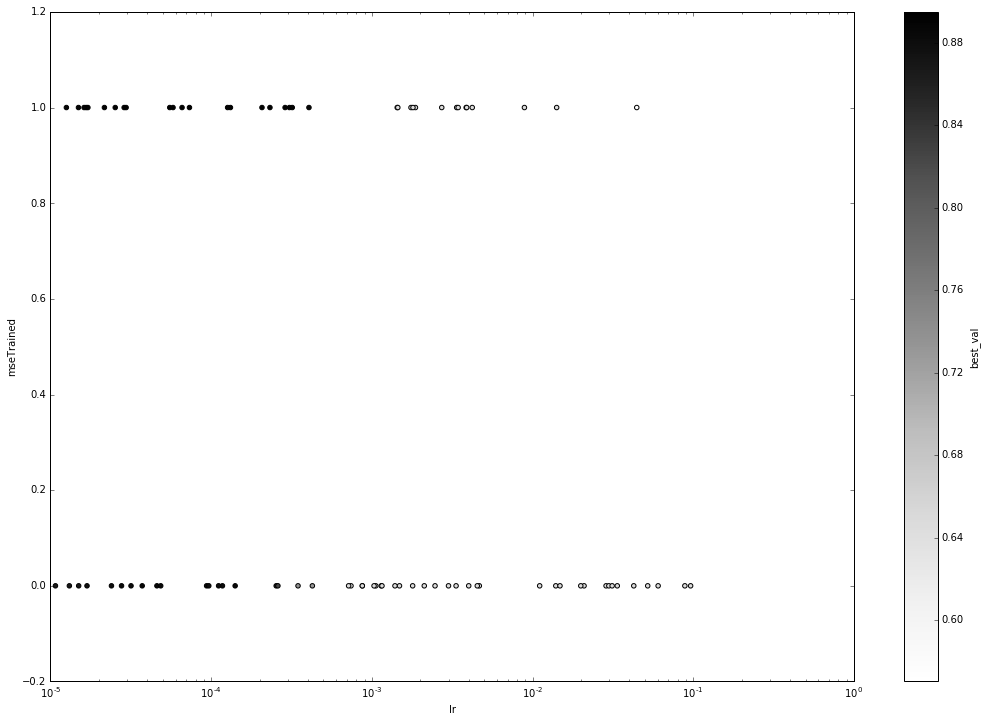

In [21]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = [18.0, 12]

df["mseTrained"] = df["criterion"].apply(lambda x: 1 if x == "mse" else 0)
df[df["best_val"] > 0.53].plot.scatter(x='lr', y='mseTrained', c='best_val', logx=True, sharex=False)

           momentum  epochs  best_val  lr  debug  data  lr_schedule  \
criterion                                                             
l1               53      53        51  53     53    53           53   
mse              47      47        47  47     47    47           47   

           weight_decay  batch_size  cache_filepath  workers  pretrained  \
criterion                                                                  
l1                   53          53              53       53          53   
mse                  47          47              47       47          47   

           model  optimizer  
criterion                    
l1            53         53  
mse           47         47  


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4bca9dda0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fe4bca2c5f8>], dtype=object)

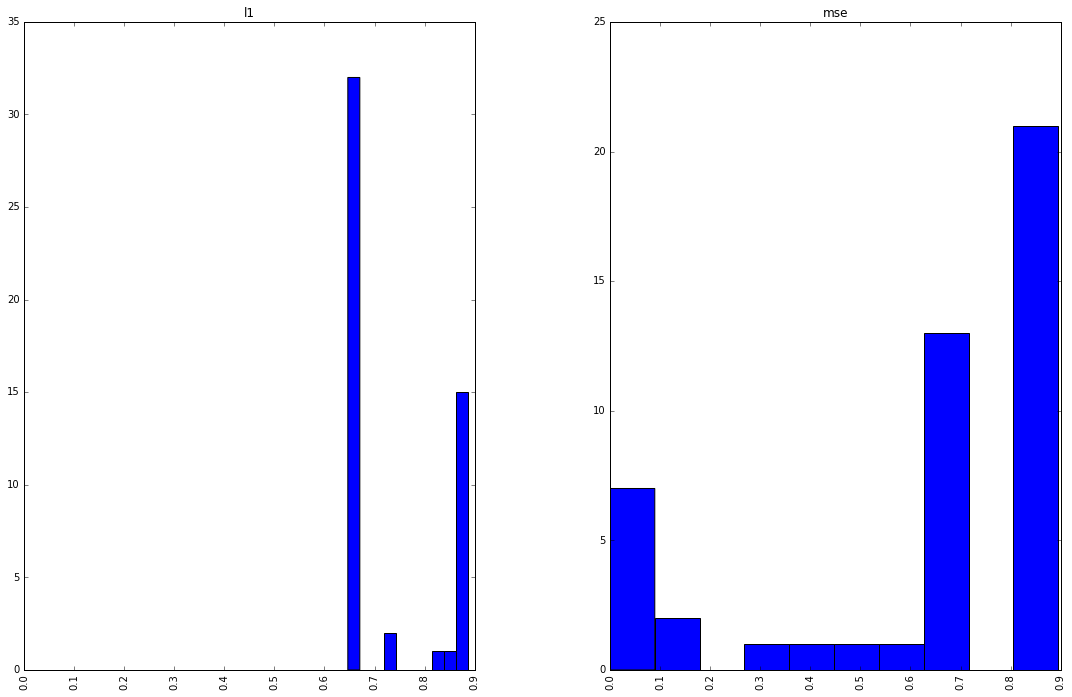

In [17]:
print(df.groupby("criterion").count())
df.hist("best_val", by="criterion", sharex=True)

In [ ]:
import os
from runs.train import encode_args